In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import timeit

In [2]:
# datasets
dirty_train1 = pd.read_csv("./data/dirty_acm_train.tsv", sep="\t")
dirty_train2 = pd.read_csv("./data/dirty_scholar_train.tsv", sep="\t")
dirty_train3 = pd.read_csv("./data/dirty_amazon_train.tsv", sep="\t")
dirty_train4 = pd.read_csv("./data/dirty_walmart_train.tsv", sep="\t")
clean_train1 = pd.read_csv("./data/clean_acm_train.tsv", sep="\t")
clean_train2 = pd.read_csv("./data/clean_scholar_train.tsv", sep="\t")
clean_train3 = pd.read_csv("./data/clean_amazon_train.tsv", sep="\t")
clean_train4 = pd.read_csv("./data/clean_walmart_train.tsv", sep="\t")
dirty_test1 = pd.read_csv("./data/dirty_acm_test.tsv", sep="\t")
dirty_test2 = pd.read_csv("./data/dirty_scholar_test.tsv", sep="\t")
dirty_test3 = pd.read_csv("./data/dirty_amazon_test.tsv", sep="\t")
dirty_test4 = pd.read_csv("./data/dirty_walmart_test.tsv", sep="\t")
clean_test1 = pd.read_csv("./data/clean_acm_test.tsv", sep="\t")
clean_test2 = pd.read_csv("./data/clean_scholar_test.tsv", sep="\t")
clean_test3 = pd.read_csv("./data/clean_amazon_test.tsv", sep="\t")
clean_test4 = pd.read_csv("./data/clean_walmart_test.tsv", sep="\t")

In [4]:
# crossparsing
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

def getDistanceCross(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

## dblp acm

dblp acm clean character crossparsing
threshold of the training set is:0.23
f1 score of training set is:0.9303519061583578
f1 score of the testing set is:0.9218921892189219
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.94      0.92       444

    accuracy                           0.97      2473
   macro avg       0.94      0.96      0.95      2473
weighted avg       0.97      0.97      0.97      2473

[[1983   46]
 [  25  419]]
2min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


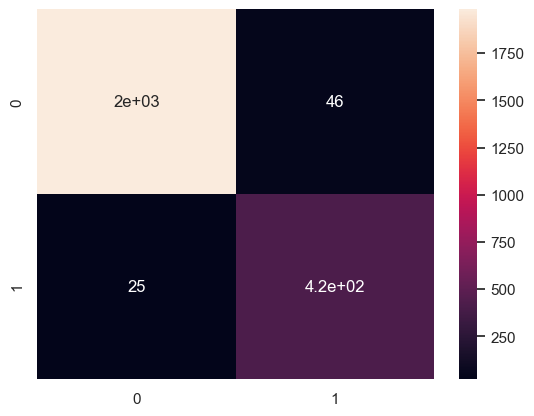

In [8]:
%%timeit -r 1 -n 1
# dblp acm clean crossparsing
dist_train_cross_1_1 = getDistanceCross(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_cross_1_1, f_train_cross_1_1 = max_threshold(dist_train_cross_1_1, real_train1_1)
print('dblp acm clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_1_1))
print('f1 score of training set is:{}'.format(f_train_cross_1_1))
dist_test_cross_1_1 = getDistanceCross(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_cross_1_1 = prediction(dist_test_cross_1_1, t_train_cross_1_1)
pre_cross_1_1 = toInt(pre_list_cross_1_1)
f_test_cross_1_1 = f1_score(real_test1_1, pre_cross_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_1_1))
print(classification_report(real_test1_1, pre_cross_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_cross_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

dblp acm dirty character crossparsing
threshold of the training set is:0.25
f1 score of training set is:0.9346879535558781
f1 score of the testing set is:0.9270946681175191
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.96      0.93       444

    accuracy                           0.97      2473
   macro avg       0.94      0.97      0.96      2473
weighted avg       0.97      0.97      0.97      2473

[[1980   49]
 [  18  426]]
2min 46s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


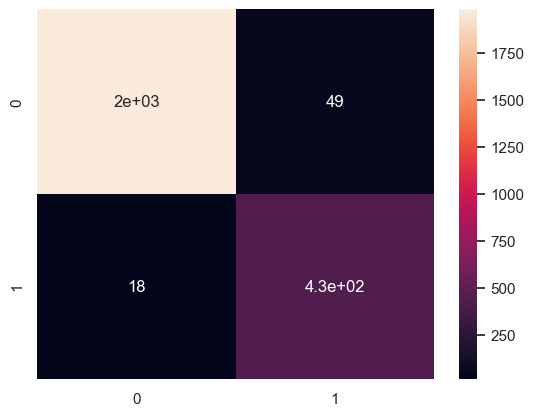

In [9]:
%%timeit -r 1 -n 1
# dblp acm dirty crossparsing
dist_train_cross_1_1 = getDistanceCross(dirty_train1['text_left'], dirty_train1['text_right'])
real_train1_1 = toInt(dirty_train1['label'])
t_train_cross_1_1, f_train_cross_1_1 = max_threshold(dist_train_cross_1_1, real_train1_1)
print('dblp acm dirty character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_1_1))
print('f1 score of training set is:{}'.format(f_train_cross_1_1))
dist_test_cross_1_1 = getDistanceCross(dirty_test1['text_left'], dirty_test1['text_right'])
real_test1_1 = toInt(dirty_test1['label'])
pre_list_cross_1_1 = prediction(dist_test_cross_1_1, t_train_cross_1_1)
pre_cross_1_1 = toInt(pre_list_cross_1_1)
f_test_cross_1_1 = f1_score(real_test1_1, pre_cross_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_1_1))
print(classification_report(real_test1_1, pre_cross_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_cross_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## dblp scholar

### crossparsing

dblp scholar clean character crossparsing
threshold of the training set is:0.29
f1 score of training set is:0.8883343730505303
f1 score of the testing set is:0.89014615747289
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4672
           1       0.90      0.88      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.94      0.93      0.93      5742
weighted avg       0.96      0.96      0.96      5742

[[4565  107]
 [ 126  944]]
4min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


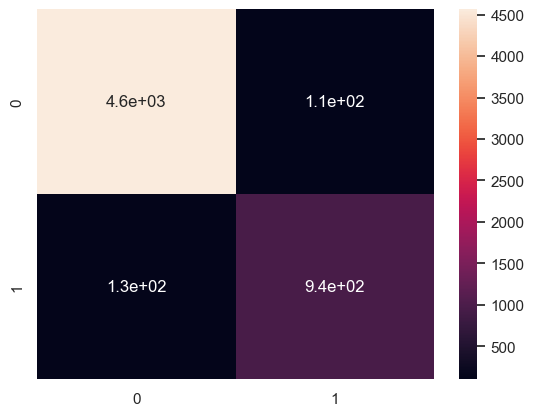

In [18]:
%%timeit -r 1 -n 1
# dblp scholar clean crossparsing
dist_train_cross_2_1 = getDistanceCross(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_cross_2_1, f_train_cross_2_1 = max_threshold(dist_train_cross_2_1, real_train2_1)
print('dblp scholar clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_2_1))
print('f1 score of training set is:{}'.format(f_train_cross_2_1))
dist_test_cross_2_1 = getDistanceCross(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_cross_2_1 = prediction(dist_test_cross_2_1, t_train_cross_2_1)
pre_cross_2_1 = toInt(pre_list_cross_2_1)
f_test_cross_2_1 = f1_score(real_test2_1, pre_cross_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_2_1))
print(classification_report(real_test2_1, pre_cross_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_cross_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

dblp scholar dirty character crossparsing
threshold of the training set is:0.3
f1 score of training set is:0.8864898210980876
f1 score of the testing set is:0.8938547486033519
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4672
           1       0.89      0.90      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.93      0.94      0.93      5742
weighted avg       0.96      0.96      0.96      5742

[[4554  118]
 [ 110  960]]
4min 8s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


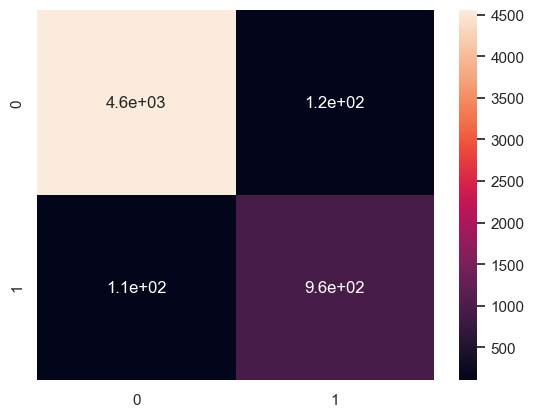

In [19]:
%%timeit -r 1 -n 1
# dblp scholar dirty crossparsing
dist_train_cross_2_1 = getDistanceCross(dirty_train2['text_left'], dirty_train2['text_right'])
real_train2_1 = toInt(dirty_train2['label'])
t_train_cross_2_1, f_train_cross_2_1 = max_threshold(dist_train_cross_2_1, real_train2_1)
print('dblp scholar dirty character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_2_1))
print('f1 score of training set is:{}'.format(f_train_cross_2_1))
dist_test_cross_2_1 = getDistanceCross(dirty_test2['text_left'], dirty_test2['text_right'])
real_test2_1 = toInt(dirty_test2['label'])
pre_list_cross_2_1 = prediction(dist_test_cross_2_1, t_train_cross_2_1)
pre_cross_2_1 = toInt(pre_list_cross_2_1)
f_test_cross_2_1 = f1_score(real_test2_1, pre_cross_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_2_1))
print(classification_report(real_test2_1, pre_cross_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_cross_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## amazon itunes

### crossparsing

amazon itunes clean character crossparsing
threshold of the training set is:0.4
f1 score of training set is:0.5254237288135593
f1 score of the testing set is:0.5063291139240507
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        82
           1       0.38      0.74      0.51        27

    accuracy                           0.64       109
   macro avg       0.63      0.68      0.61       109
weighted avg       0.76      0.64      0.67       109

[[50 32]
 [ 7 20]]
17.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


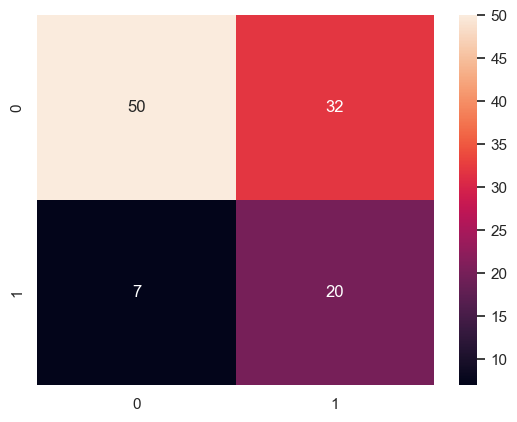

In [28]:
%%timeit -r 1 -n 1
# amazon itunes clean crossparsing
dist_train_cross_3_1 = getDistanceCross(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_cross_3_1, f_train_cross_3_1 = max_threshold(dist_train_cross_3_1, real_train3_1)
print('amazon itunes clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_3_1))
print('f1 score of training set is:{}'.format(f_train_cross_3_1))
dist_test_cross_3_1 = getDistanceCross(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_cross_3_1 = prediction(dist_test_cross_3_1, t_train_cross_3_1)
pre_cross_3_1 = toInt(pre_list_cross_3_1)
f_test_cross_3_1 = f1_score(real_test3_1, pre_cross_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_3_1))
print(classification_report(real_test3_1, pre_cross_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_cross_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

amazon itunes dirty character crossparsing
threshold of the training set is:0.46
f1 score of training set is:0.5281690140845071
f1 score of the testing set is:0.5263157894736842
              precision    recall  f1-score   support

           0       0.95      0.48      0.63        82
           1       0.37      0.93      0.53        27

    accuracy                           0.59       109
   macro avg       0.66      0.70      0.58       109
weighted avg       0.81      0.59      0.61       109

[[39 43]
 [ 2 25]]
17.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


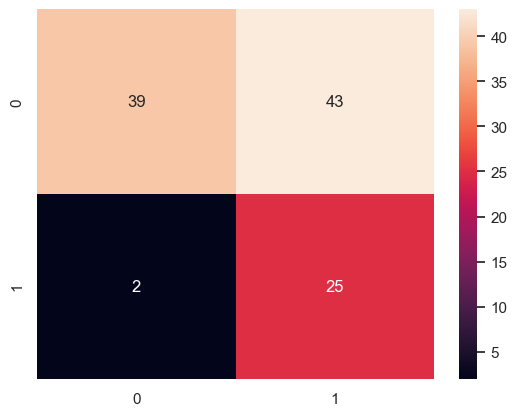

In [29]:
%%timeit -r 1 -n 1
# amazon itunes dirty crossparsing
dist_train_cross_3_1 = getDistanceCross(dirty_train3['text_left'], dirty_train3['text_right'])
real_train3_1 = toInt(dirty_train3['label'])
t_train_cross_3_1, f_train_cross_3_1 = max_threshold(dist_train_cross_3_1, real_train3_1)
print('amazon itunes dirty character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_3_1))
print('f1 score of training set is:{}'.format(f_train_cross_3_1))
dist_test_cross_3_1 = getDistanceCross(dirty_test3['text_left'], dirty_test3['text_right'])
real_test3_1 = toInt(dirty_test3['label'])
pre_list_cross_3_1 = prediction(dist_test_cross_3_1, t_train_cross_3_1)
pre_cross_3_1 = toInt(pre_list_cross_3_1)
f_test_cross_3_1 = f1_score(real_test3_1, pre_cross_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_3_1))
print(classification_report(real_test3_1, pre_cross_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_cross_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

## walmart amazon

### crossparsing

amazon itunes clean character crossparsing
threshold of the training set is:0.28
f1 score of training set is:0.4316436251920123
f1 score of the testing set is:0.42990654205607476
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.39      0.48      0.43       193

    accuracy                           0.88      2049
   macro avg       0.67      0.70      0.68      2049
weighted avg       0.89      0.88      0.89      2049

[[1713  143]
 [ 101   92]]
1min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


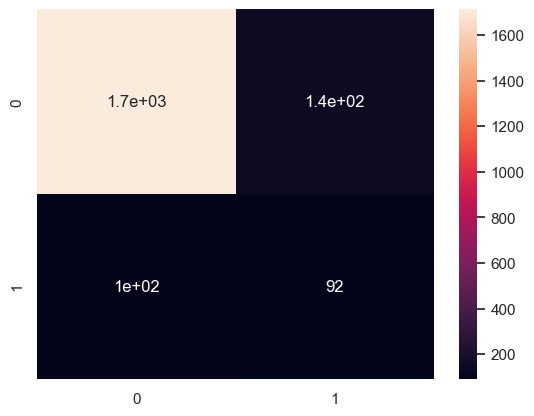

In [38]:
%%timeit -r 1 -n 1
# walmart amazon clean crossparsing
dist_train_cross_4_1 = getDistanceCross(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_cross_4_1, f_train_cross_4_1 = max_threshold(dist_train_cross_4_1, real_train4_1)
print('amazon itunes clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_4_1))
print('f1 score of training set is:{}'.format(f_train_cross_4_1))
dist_test_cross_4_1 = getDistanceCross(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_cross_4_1 = prediction(dist_test_cross_4_1, t_train_cross_4_1)
pre_cross_4_1 = toInt(pre_list_cross_4_1)
f_test_cross_4_1 = f1_score(real_test4_1, pre_cross_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_4_1))
print(classification_report(real_test4_1, pre_cross_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_cross_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

amazon itunes dirty character crossparsing
threshold of the training set is:0.29
f1 score of training set is:0.4147812971342383
f1 score of the testing set is:0.41002277904328016
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.37      0.47      0.41       193

    accuracy                           0.87      2049
   macro avg       0.65      0.69      0.67      2049
weighted avg       0.89      0.87      0.88      2049

[[1700  156]
 [ 103   90]]
1min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


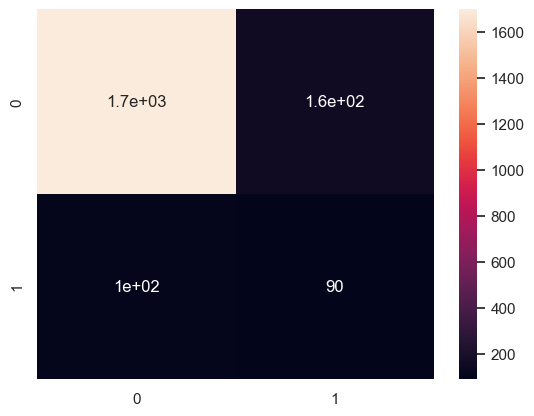

In [39]:
%%timeit -r 1 -n 1
# walmart amazon dirty crossparsing
dist_train_cross_4_1 = getDistanceCross(dirty_train4['text_left'], dirty_train4['text_right'])
real_train4_1 = toInt(dirty_train4['label'])
t_train_cross_4_1, f_train_cross_4_1 = max_threshold(dist_train_cross_4_1, real_train4_1)
print('amazon itunes dirty character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_4_1))
print('f1 score of training set is:{}'.format(f_train_cross_4_1))
dist_test_cross_4_1 = getDistanceCross(dirty_test4['text_left'], dirty_test4['text_right'])
real_test4_1 = toInt(dirty_test4['label'])
pre_list_cross_4_1 = prediction(dist_test_cross_4_1, t_train_cross_4_1)
pre_cross_4_1 = toInt(pre_list_cross_4_1)
f_test_cross_4_1 = f1_score(real_test4_1, pre_cross_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_4_1))
print(classification_report(real_test4_1, pre_cross_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_cross_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)